In [1]:
# Classifying MNIST digits with a softmax classifier
# Name:

In this assignment, you will implement a softmax classifier to predict the digit presented in a given image. We will use the MNIST dataset for this task. Please first skim through the notebook. Then complete the following steps mentioned in the main function:

1. minibatch
2. init_params
3. forward and backward propagation
    * softmax_forw
    * softmax_back_and_loss
4. grad_check
5. train

In [27]:
using Pkg; for p in ["Knet"]; haskey(Pkg.installed(),p) || Pkg.add(p); end #Knet installation to use the MNIST dataset
using Knet, Printf, Random
import Knet: minibatch, accuracy
include(Knet.dir("data", "mnist.jl"))

In [28]:
# takes raw input (X) and gold labels (Y)
# returns list of minibatches (x, y)
function minibatch(X, Y, bs=100)
    data = Any[]

    # Your code here  
    for i=1:bs:size(X,2)
        j=min(i+bs-1,size(X,2))
        next_batch = (X[:,i:j],Y[:,i:j])
        push!(data, next_batch)
    end
    #
    return data

end

minibatch (generic function with 2 methods)

In [29]:
# init_params(ninputs, noutputs)
# this functions takes two arguments,
#   number of input features (ninputs::Int)
#   and number of output classes (noutputs::Int)
# returns randomly generated W (sampled from N(0,1e-3))
#   and b(must be zeros vector) params of softmax
function init_params(ninputs, noutputs)

    # Your code here
    W = randn(noutputs,ninputs) * 0.001
    b = zeros(noutputs)
    #
    return W,b
end

init_params (generic function with 1 method)

In [30]:
# softmax_forw(W, b, x)
# this function takes three arguments,
#   model weights (W,b) and single minibatch input data (x)
# applies the affine transformation and softmax function
# returns predicted probabilities
function softmax_forw(W, b, x)
    # Your code here
    y_pred = W * x .+ b
    probability = zeros(size(y_pred)) 
    for i = 1: size(x,2)     
        probability[:,i] = exp.(y_pred[:,i]) ./ sum(exp.(y_pred[:,i]))
    end
    return probability
end

softmax_forw (generic function with 1 method)

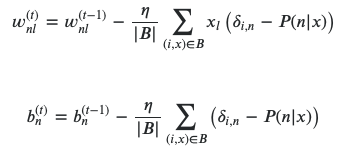

In [31]:
# softmax_back_and_loss(W, b, x, ygold)
# takes model weights (W,b), input data (x) and correct labels (ygold)
# calculates and returns the soft loss, gradients of w and b
function softmax_back_and_loss(W, b, x, ygold)
    # Your code here
    y_head = softmax_forw(W,b,x)
    y_size = size(x,2)
    
    gradW = ((y_head-ygold) * transpose(x)) ./ y_size
    gradb = sum((y_head - ygold),dims = 2) ./ y_size
    loss = -1 * sum(ygold .* log.(y_head)) ./ y_size

    return loss,gradW,gradb
    #
end

softmax_back_and_loss (generic function with 1 method)

In [74]:
# grad_check(W, b, x, ygold)
# takes model weights (W,b), one minibatch input data (x) and
# and true labels (ygold) as input parameters
# displays info about whether your gradient calculation procedure
# passes the gradient check test or not.
function grad_check(W, b, x, ygold)
    # numeric_gradient()
    # calculates and returns numeric gradients of model weights (gw,gb)
    function numeric_gradient()
        epsilon = 0.0001

        gw = zeros(size(W)) # gradient of W
        gb = zeros(size(b)) # gradient of b

        # Your code here

        for i = 1 : size(W,1)
            for j = 1 : size(W,2)
               
                W[i,j] = W[i,j] + epsilon
                c1 , _ , _ = softmax_back_and_loss(W,b,x,ygold)
                W[i,j] = W[i,j] - 2 * epsilon
                c2 , _ , _ = softmax_back_and_loss(W,b,x,ygold)
                gw[i,j] = (c1 - c2) / 2 * epsilon
                W[i,j] = W[i,j] + epsilon
            end
        end
        
        for k = 1 : size(b,1)
            b[k] = b[k] + epsilon
            cost1,_,_ = softmax_back_and_loss(W,b,x,ygold)
            b[k] = b[k] - 2epsilon
            cost2,_,_ = softmax_back_and_loss(W,b,x,ygold)
            gb[k] = (cost1 - cost2) / 2 * epsilon
            b[k] = b[k] + epsilon
        end
        
        #
        
        return gw, gb
    end

    _,gradW,gradB = softmax_back_and_loss(W, b, x, ygold)
    gw, gb = numeric_gradient()

    diff = sqrt(sum((gradW - gw) .^ 2) + sum((gradB - gb) .^ 2))
    println("Diff: $diff")
    if diff < 1e-7
        println("Gradient Checking Passed")
    else
        println("Diff must be < 1e-7")
    end
end

grad_check (generic function with 1 method)

In [75]:
main()

yess2.3028237525263133
2.3028237525263133


UndefVarError: UndefVarError: types not defined

In [50]:
# train(W, b, data, lr=0.15)
# takes model weights (W,b), data split (data) and learning rate (lr) as input
# iterates over the whole data split and in each iteration network is updated
# by using the gradients obtained from softmax_back_and_loss function call. default learning
# rate is 0.15. it returns the average softloss over the whole data split.
function train(W, b, data, lr=0.15)
    totalcost = 0.0
    numins = 0
    for (x, y) in data
        # Your code here
        loss,gradW,gradb = softmax_back_and_loss(W,b,x,y)
        copyto!(W,W-gradW * lr)
        copyto!(b,b - gradb * lr)
        totalcost = totalcost + loss
        numins += 1   
        #
    end

    avgcost = totalcost / numins
end

train (generic function with 2 methods)

In [51]:
# Don't touch this cell. Read it carefully.
# accuracy(ygold, ypred)
# takes true labels (ygold) and predicted scores as input for single minibatch.
# returns accuracy
function accuracy(ygold, ypred)
    correct = 0.0
    for i=1:size(ygold, 2)
        correct += findmax(ygold[:,i]; dims=1)[2] == findmax(ypred[:, i]; dims=1)[2] ? 1.0 : 0.0
    end
    return correct / size(ygold, 2)
end

accuracy (generic function with 4 methods)

In [52]:
# Don't touch this cell. Read it carefully.
function main()
    Random.seed!(12345)

    # Size of input vector (MNIST images are 28x28)
    ninputs = 28 * 28

    # Number of classes (MNIST images fall into 10 classes)
    noutputs = 10

    ### Data loading & preprocessing
    #
    #  In this section, we load the input and output data,
    #  prepare data to feed into softmax model.
    #  For softmax regression on MNIST pixels,
    #  the input data is the images, and
    #  the output data is the labels.
    #  Size of xtrn: (28,28,1,60000)
    #  Size of xtrn must be: (784, 60000)
    #  Size of xtst must be: (784, 10000)
    #  Size of ytrn must be: (10, 60000)
    #  Size of ytst must be: (10, 10000)

    xtrn, ytrn, xtst, ytst = mnist() # loading the data
    xtrn = reshape(xtrn, 784, 60000)
    xtst = reshape(xtst, 784, 10000)

    function to_onehot(x)
        onehot = zeros(10, 1)
        onehot[x, 1] = 1.0
        return onehot
    end

    ytrn = hcat(map(to_onehot, ytrn)...)
    ytst = hcat(map(to_onehot, ytst)...)

    # STEP 1: Create minibatches
    #   Complete the minibatch function
    #   It takes the input matrix (X) and gold labels (Y)
    #   returns list of tuples contain minibatched input and labels (x, y)
    bs = 100
    trn_data = minibatch(xtrn, ytrn, bs)

    # STEP 2: Initialize parameters
    #   Complete init_params function
    #   It takes number of inputs and number of outputs(number of classes)
    #   It returns randomly generated W matrix and bias vector
    #   Sample from N(0, 0.001)

    W, b = init_params(ninputs, noutputs)

    # STEP 3: Implement softmax_forw and softmax_back_and_loss
    #   softmax_forw function takes W, b, and data
    #   calculates predicted probabilities
    #
    #   softmax_back_and_loss function obtains probabilites by calling
    #   softmax_forw then calculates soft loss and gradients of W and b

    # STEP 4: Gradient checking
    #   Skip this part for the lab session.
    #   As with any learning algorithm, you should always check that your
    #   gradients are correct before learning the parameters.

    debug = true # Turn this parameter off, after gradient checking passed
    if debug
        grad_check(W, b, xtrn[:, 1:100], ytrn[:, 1:100])
    end

    lr = 0.15

    # STEP 5: Training
    #   The train function takes model parameters and the data
    #   Trains the model over minibatches
    #   For each minibatch, first cost and gradients are calculated then model parameters are updated
    #   train function returns the average cost per instance

    for i=1:50
        cost = train(W, b, trn_data, lr)
        pred = softmax_forw(W, b, xtrn)
        trnacc = accuracy(ytrn, pred)
        pred = softmax_forw(W, b, xtst)
        tstacc = accuracy(ytst, pred)
        @printf("epoch: %d softloss: %g trn accuracy: %g tst accuracy: %g\n", i, cost, trnacc, tstacc)
    end
end

main (generic function with 1 method)

In [53]:
main()

#= Example Output
Diff: 1.8292339049184216e-9
Gradient Checking Passed
epoch: 1 softloss: 0.481559 trn accuracy: 0.896983 tst accuracy: 0.9064
epoch: 2 softloss: 0.339105 trn accuracy: 0.907617 tst accuracy: 0.9119
epoch: 3 softloss: 0.31604 trn accuracy: 0.912017 tst accuracy: 0.9142
epoch: 4 softloss: 0.303876 trn accuracy: 0.914783 tst accuracy: 0.9156
epoch: 5 softloss: 0.29597 trn accuracy: 0.916567 tst accuracy: 0.9172
epoch: 6 softloss: 0.290259 trn accuracy: 0.918033 tst accuracy: 0.9187
epoch: 7 softloss: 0.285858 trn accuracy: 0.919233 tst accuracy: 0.9198
epoch: 8 softloss: 0.282317 trn accuracy: 0.920083 tst accuracy: 0.92
epoch: 9 softloss: 0.279378 trn accuracy: 0.9209 tst accuracy: 0.9204
epoch: 10 softloss: 0.276879 trn accuracy: 0.921717 tst accuracy: 0.9211
epoch: 11 softloss: 0.274716 trn accuracy: 0.92225 tst accuracy: 0.9207
epoch: 12 softloss: 0.272816 trn accuracy: 0.92305 tst accuracy: 0.9214
epoch: 13 softloss: 0.271127 trn accuracy: 0.923667 tst accuracy: 0.9214
epoch: 14 softloss: 0.269609 trn accuracy: 0.924133 tst accuracy: 0.9215
epoch: 15 softloss: 0.268235 trn accuracy: 0.924417 tst accuracy: 0.922
epoch: 16 softloss: 0.26698 trn accuracy: 0.9247 tst accuracy: 0.9219
epoch: 17 softloss: 0.265828 trn accuracy: 0.924933 tst accuracy: 0.9218
epoch: 18 softloss: 0.264764 trn accuracy: 0.92505 tst accuracy: 0.922
epoch: 19 softloss: 0.263777 trn accuracy: 0.925367 tst accuracy: 0.9223
epoch: 20 softloss: 0.262856 trn accuracy: 0.92575 tst accuracy: 0.9225
epoch: 21 softloss: 0.261995 trn accuracy: 0.9263 tst accuracy: 0.9227
epoch: 22 softloss: 0.261186 trn accuracy: 0.926567 tst accuracy: 0.9226
epoch: 23 softloss: 0.260424 trn accuracy: 0.9269 tst accuracy: 0.9229
epoch: 24 softloss: 0.259704 trn accuracy: 0.92715 tst accuracy: 0.9227
epoch: 25 softloss: 0.259022 trn accuracy: 0.927367 tst accuracy: 0.9227
epoch: 26 softloss: 0.258374 trn accuracy: 0.9275 tst accuracy: 0.9229
epoch: 27 softloss: 0.257758 trn accuracy: 0.927767 tst accuracy: 0.923
epoch: 28 softloss: 0.257171 trn accuracy: 0.928083 tst accuracy: 0.9229
epoch: 29 softloss: 0.25661 trn accuracy: 0.92825 tst accuracy: 0.9231
epoch: 30 softloss: 0.256073 trn accuracy: 0.92835 tst accuracy: 0.9229
epoch: 31 softloss: 0.255558 trn accuracy: 0.928517 tst accuracy: 0.923
epoch: 32 softloss: 0.255064 trn accuracy: 0.928783 tst accuracy: 0.9228
epoch: 33 softloss: 0.254589 trn accuracy: 0.92895 tst accuracy: 0.9229
epoch: 34 softloss: 0.254133 trn accuracy: 0.9291 tst accuracy: 0.9227
epoch: 35 softloss: 0.253692 trn accuracy: 0.929167 tst accuracy: 0.9228
epoch: 36 softloss: 0.253268 trn accuracy: 0.92925 tst accuracy: 0.9227
epoch: 37 softloss: 0.252858 trn accuracy: 0.929417 tst accuracy: 0.923
epoch: 38 softloss: 0.252462 trn accuracy: 0.929567 tst accuracy: 0.9229
epoch: 39 softloss: 0.252078 trn accuracy: 0.929667 tst accuracy: 0.9228
epoch: 40 softloss: 0.251707 trn accuracy: 0.929783 tst accuracy: 0.9229
epoch: 41 softloss: 0.251347 trn accuracy: 0.929867 tst accuracy: 0.9231
epoch: 42 softloss: 0.250998 trn accuracy: 0.930067 tst accuracy: 0.9235
epoch: 43 softloss: 0.25066 trn accuracy: 0.9301 tst accuracy: 0.9235
epoch: 44 softloss: 0.250331 trn accuracy: 0.930233 tst accuracy: 0.9235
epoch: 45 softloss: 0.250011 trn accuracy: 0.930333 tst accuracy: 0.9235
epoch: 46 softloss: 0.2497 trn accuracy: 0.9305 tst accuracy: 0.9237
epoch: 47 softloss: 0.249397 trn accuracy: 0.930583 tst accuracy: 0.9238
epoch: 48 softloss: 0.249102 trn accuracy: 0.9307 tst accuracy: 0.9239
epoch: 49 softloss: 0.248815 trn accuracy: 0.93085 tst accuracy: 0.9242
epoch: 50 softloss: 0.248535 trn accuracy: 0.930933 tst accuracy: 0.9243
=#

MethodError: MethodError: no method matching +(::Array{Float64,2}, ::Float64)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529
  +(!Matched::Bool, ::T) where T<:AbstractFloat at bool.jl:104
  +(!Matched::Float64, ::Float64) at float.jl:401
  ...

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*